<a href="https://colab.research.google.com/github/Coraliefringeli/2025_Intro_Python_Fringeli_Coralie/blob/main/notebook/W3_S2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Hurricane Track Analysis

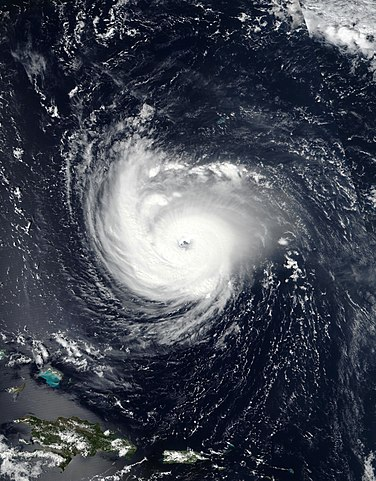

*Can you quickly find out which US states hurricane Florence passed through using `GeoPandas`?*

Image source: [NASA Worldview](https://worldview.earthdata.nasa.gov/)

```{tip} Installing GeoPandas

Please run the following code blocks in this section to:
* Install the GeoPandas's dependencies and GeoPandas
* Download and unzip the data used in this notebook
* Import GeoPandas and other required modules for the notebook
```

In [1]:
#Install GeoPandas' dependencies
!pip install --upgrade pyshp

!pip install --upgrade shapely

!pip install --upgrade descartes

!pip install --upgrade rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: pyshp
    Found existing installation: pyshp 2.3.1
    Uninstalling pyshp-2.3.1:
      Successfully uninstalled pyshp-2.3.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.6/507.6 kB 8.8 MB/s eta 0:00:00


In [2]:
#Install GeoPandas
!pip install --upgrade geopandas

In [71]:
import pooch
# Download the data used in this notebook
data = pooch.retrieve('https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew?download=1',
                          known_hash='200a740d0e448aa9e4e03d8a9965a70f228442a2da28d804c8e2337d0ef9749e',
                          processor=pooch.Unzip()
                          )

data

['/root/.cache/pooch/3d43e48bb7d0d0370db00be3096108fe-EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew.unzip/florence.csv',
 '/root/.cache/pooch/3d43e48bb7d0d0370db00be3096108fe-EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew.unzip/gz_2010_us_040_00_5m.json',
 '/root/.cache/pooch/3d43e48bb7d0d0370db00be3096108fe-EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew.unzip/__MACOSX/._gz_2010_us_040_00_5m.json',
 '/root/.cache/pooch/3d43e48bb7d0d0370db00be3096108fe-EZQnP79VVtROtOlxw5QpfoYBtPG54sb4CZ2vzlg0bKkPew.unzip/__MACOSX/._florence.csv']





References:    
1. Geopandas official website: Introduction to GeoPandas
https://geopandas.org/en/stable/getting_started/introduction.html   
2. Automating GIS process
https://autogis-site.readthedocs.io/en/latest/notebooks/L2/01-geopandas-basics.html    
3. Use Data for Earth and Environmental Science in Open Source Python
https://www.earthdatascience.org/courses/use-data-open-source-python/
4. The Shapely User Manual
https://shapely.readthedocs.io/en/stable/manual.html
5. Geospatial Analysis with Python and R
https://kodu.ut.ee/~kmoch/geopython2020/index.html
6. Introduction to Geospatial Data in Python
https://www.datacamp.com/tutorial/geospatial-data-python

**Exercise's Instructions**

* Apply GeoPandas to read in the geospatial data, plot, and analyse the track of Hurricane Florence from August 30th to September 18th 2018.
* Either write your own code, or fill in the blanks in the hidden cells 🙂

## Q1) import geopandas, pandas

In [72]:
#Import GeoPandas (as gpd), pandas, and matplotlib
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# And ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
#Import GeoPandas (as gpd), pandas, and matplotlib
import ____ as gpd
import ____ as pd
import matplotlib.pyplot as plt

## Q2) Read a Shapefile with GeoPandas's read_file function

In [74]:
# Read data with the geopandas function
# The path to the file should be /content/data/hurricane-data/gz_2010_us_040_00_5m.json
path=data[1]
country=gpd.read_file(path)

In [35]:
#@markdown Fill in the blank code. Double-click here to reveal
# Read data with the geopandas function
path = data[1]
country = gpd.____(path)

AttributeError: module 'geopandas' has no attribute '____'

## Q3) Have a look at the data, what type of geometries does the data contain?

In [75]:
# Print out the first few lines of the data
#1eres lignes de country
country.head()

#type de country
#type(country)

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [76]:
#@markdown Fill in the blank code. Double-click here to reveal
# The method to see the first few lines of the data
country.____()

AttributeError: 'GeoDataFrame' object has no attribute '____'

## Q4) Have a look at the data on a map using GeoPandas's .plot() method. Exclude Alaska and Hawaii by the attribute 'NAME' and Pandas's .isin() method. Specify the figsize to be 30 x 20.

<Axes: >

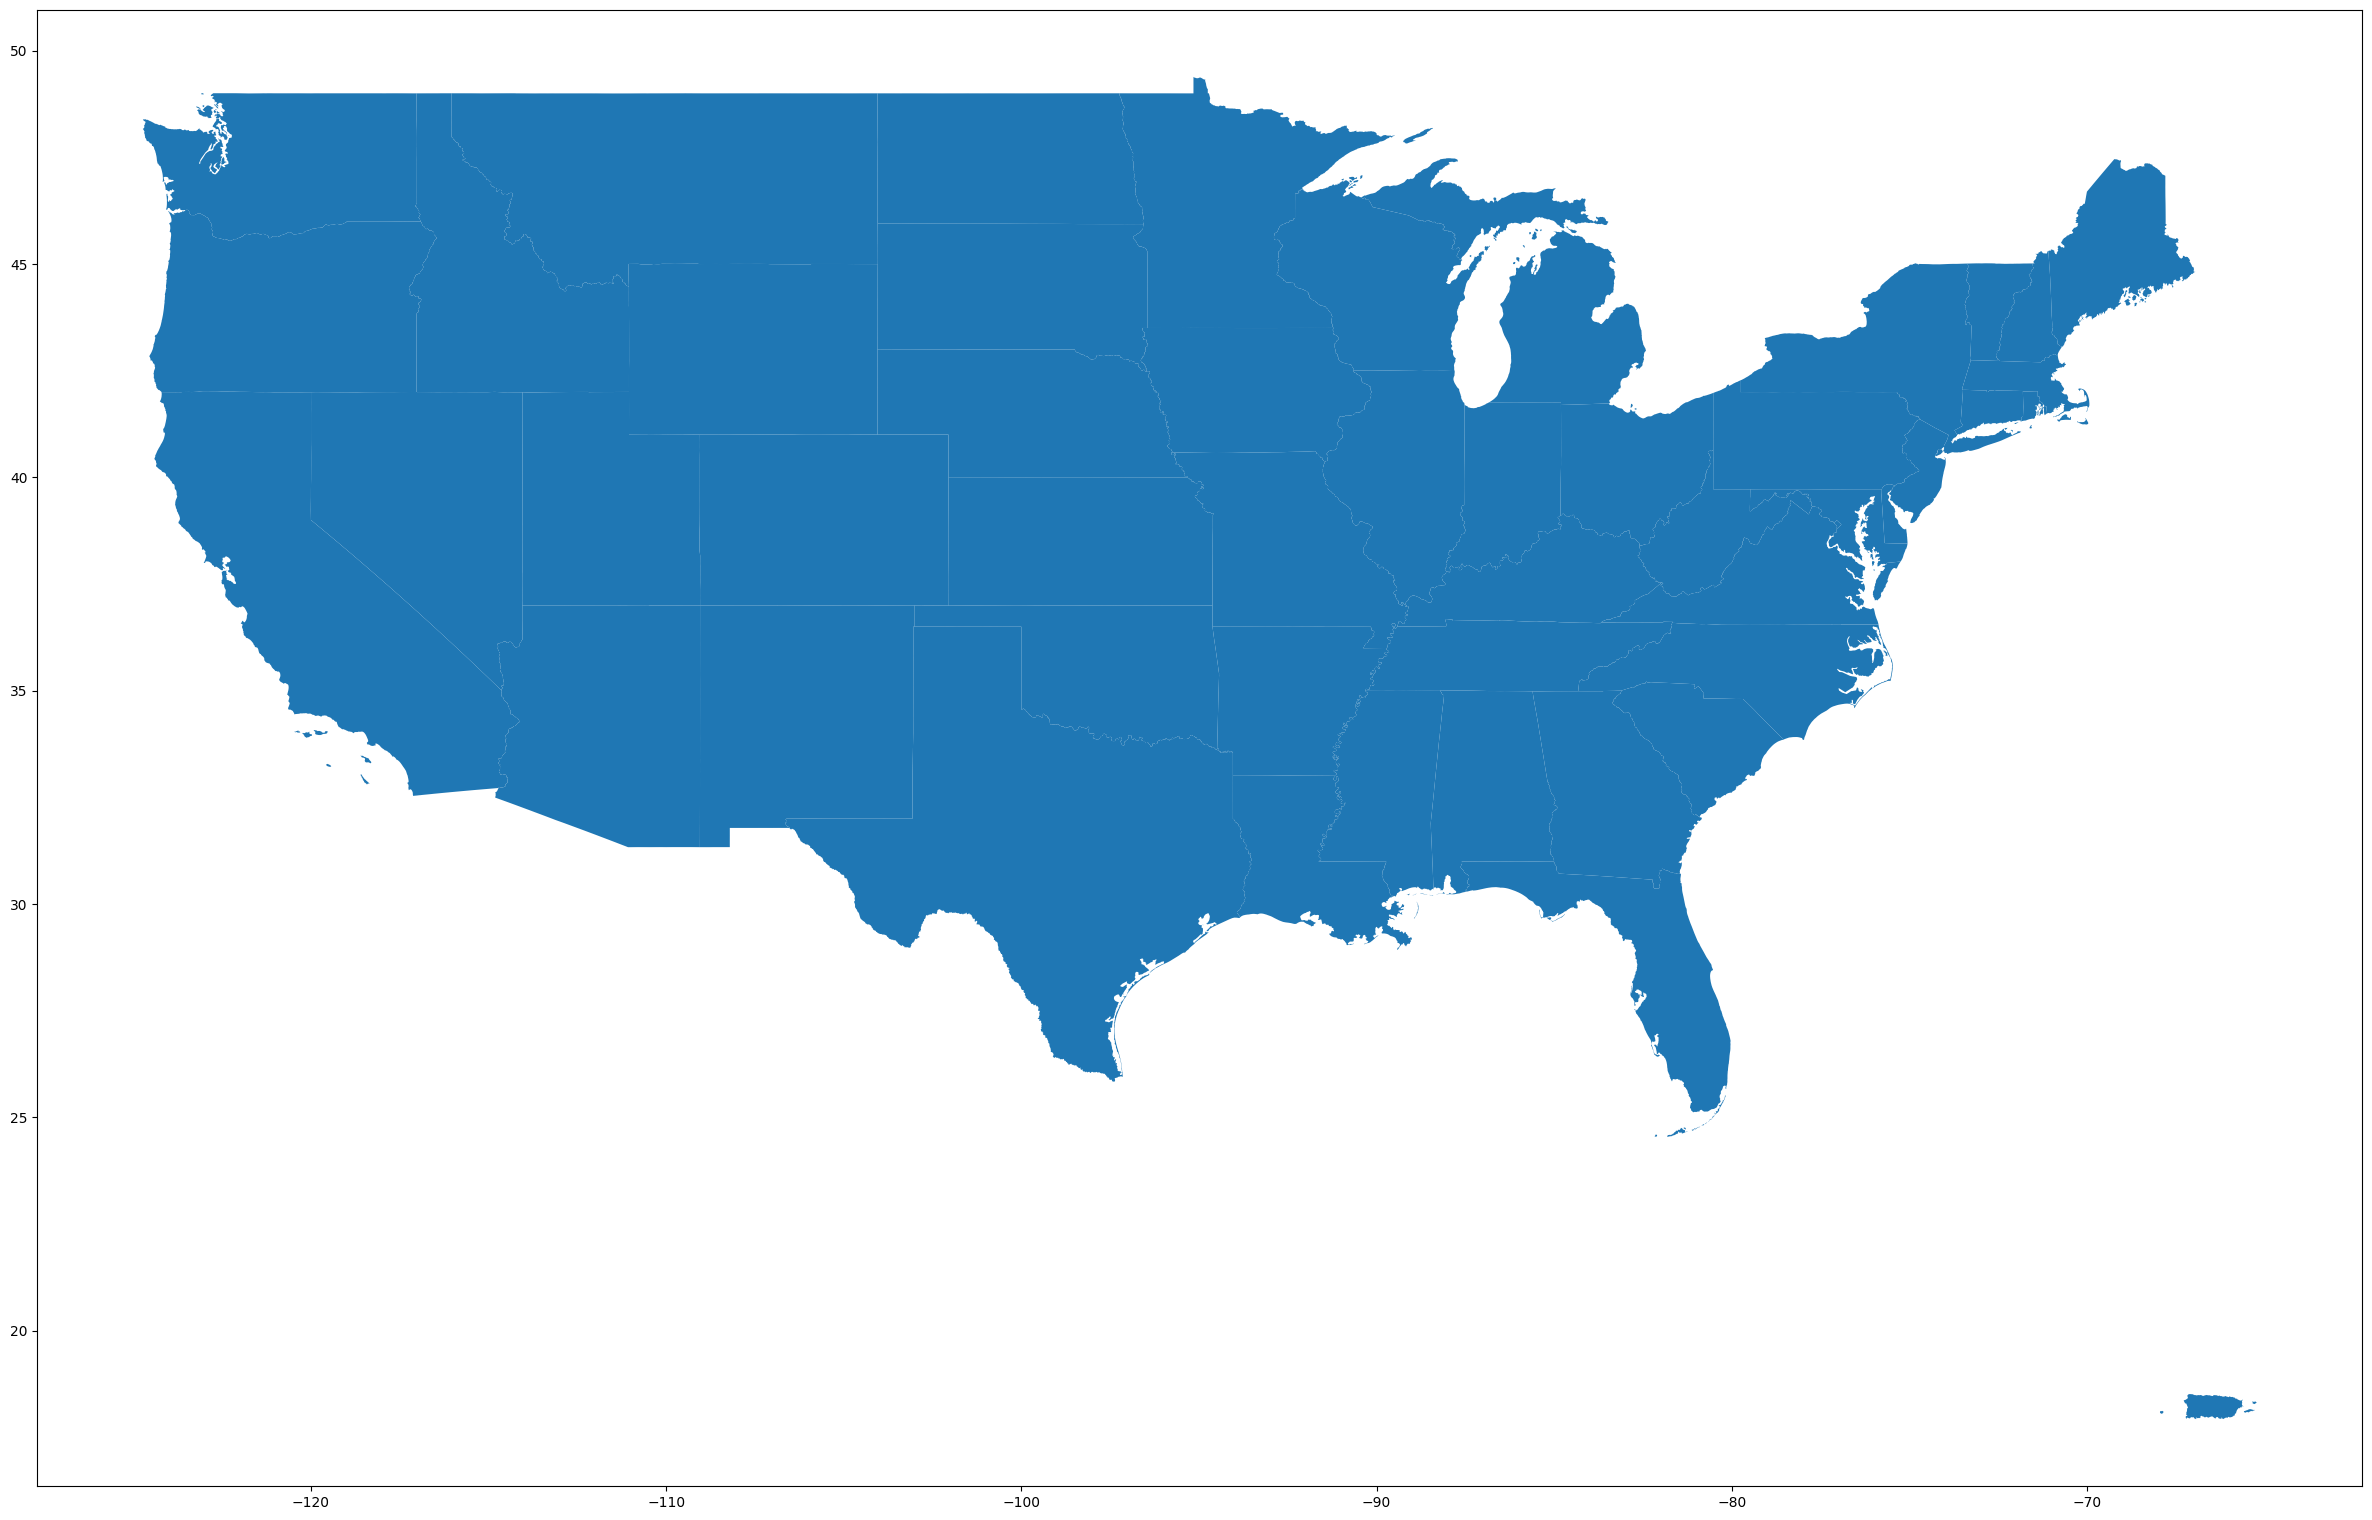

In [77]:
# Plot the US states (Alaska and Hawaii excluded)
plot_us=country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20))
plot_us



In [78]:
#@markdown Fill in the blank code. Double-click here to reveal
# Plot the US states (Alaska and Hawaii excluded)
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20))

KeyError: 'Name'

In [105]:
# Read in the hurricane florence data, change the longitude, and have a look at the hurricane florence dataframe
tc_path = data[0]
florence = pd.read_csv(tc_path)
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
           #.drop : supprimes les colonnes inutiles                    axis=1 supprime des colonnes (si c’était axis=0 --> supp. lignes).
florence['Long'] = 0 - florence['Long'] # Cette ligne inverse le signe des longitudes.
                                        #Les onvertit ici en longitudes négatives pour correspondre au format standard (ex. -80° = 80° Ouest).

florence.head(3)

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six


## Q5) Create a GeoDataFrame from florence DataFrame

In [106]:
# Create a geodataframe from the hurricane florence dataframe

gdf_hurricane_florence = gpd.GeoDataFrame(florence,geometry=gpd.points_from_xy(florence.Long,florence.Lat))



In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Create a geodataframe from the hurricane florence dataframe
gdf_florence = gpd.____(florence, geometry=gpd.____(florence.Long, florence.Lat))

In [107]:
# Have a look at the hurricane geodataframe
gdf_hurricane_florence.head(2)

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,geometry
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)


## Q6) Plot the US states map (without Alaska, Hawaii) and hurricane florence together

<Axes: >

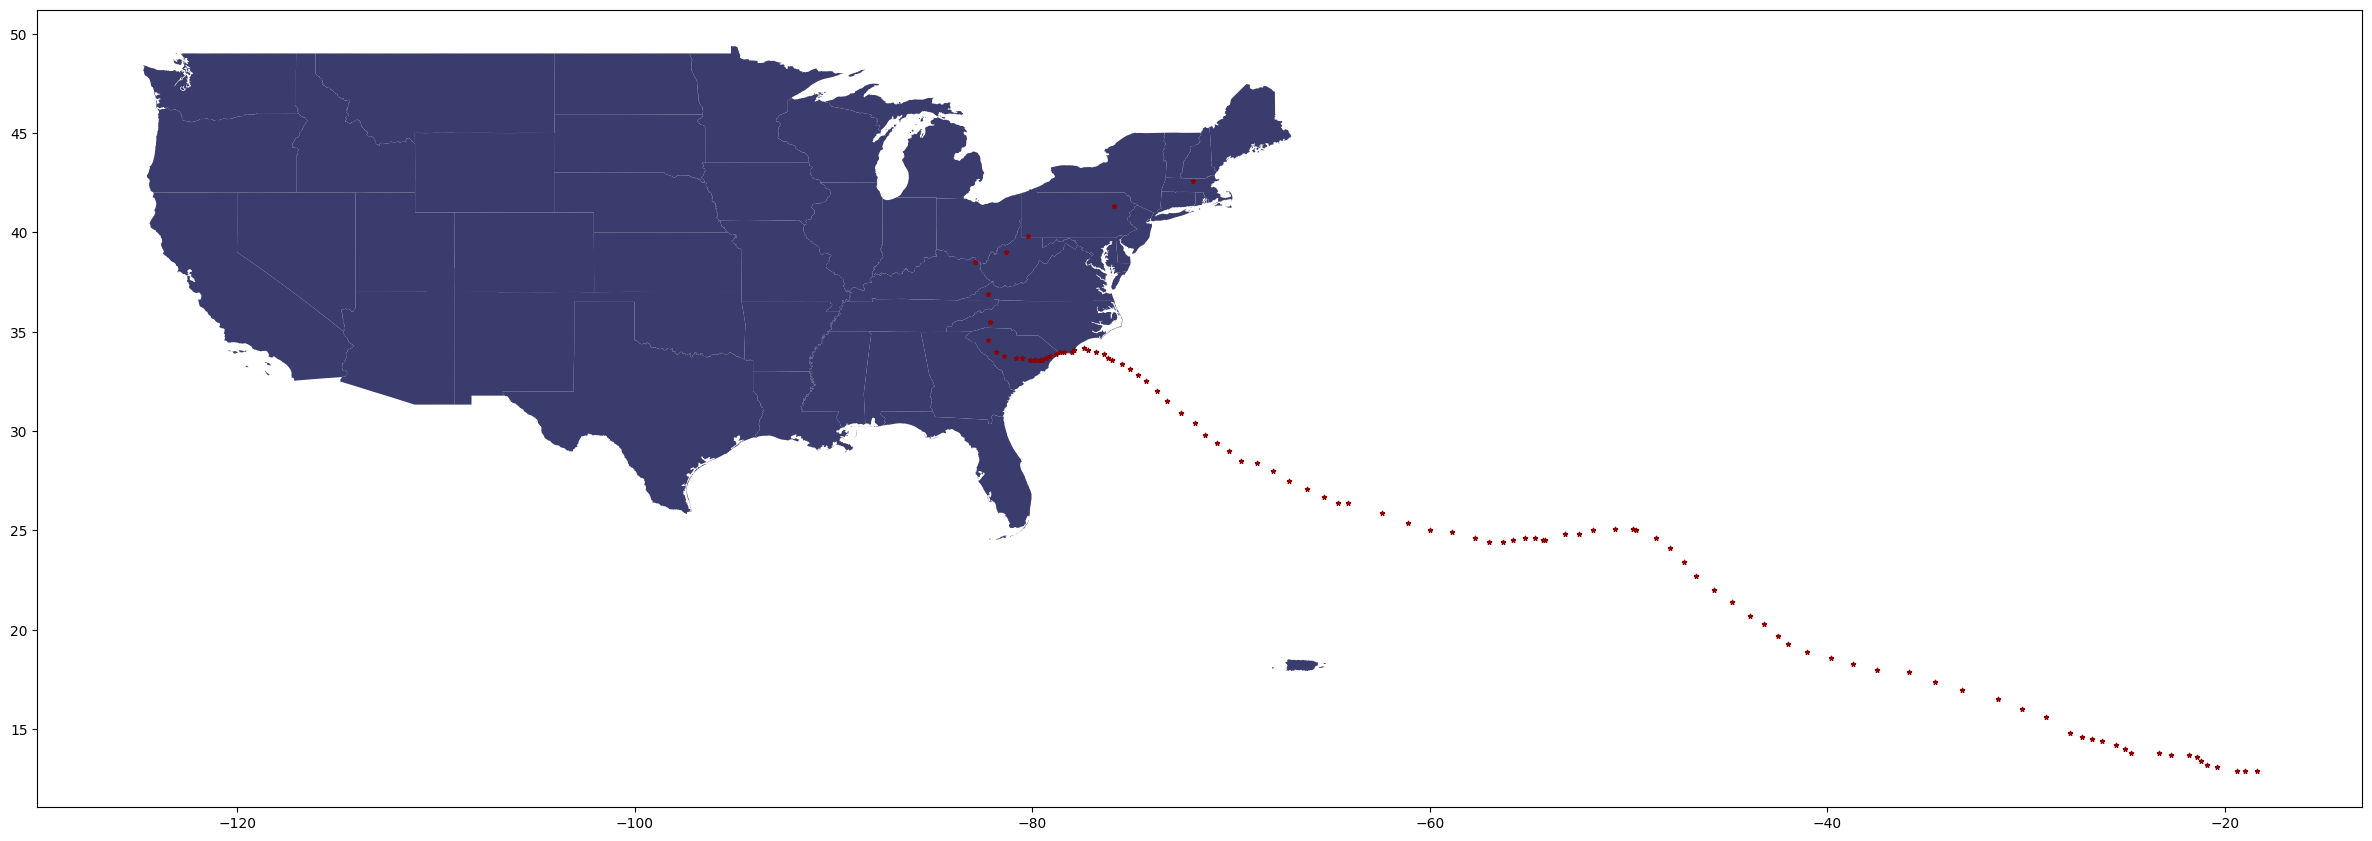

In [108]:
# Plot to see the hurricane overlay over the US map
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
gdf_hurricane_florence.plot(ax=base, color='darkred', marker="*", markersize=10)

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].____(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
gdf_florence.____(ax=base, color='darkred', marker="*", markersize=10)

## Q7) What's the coordinate reference system of the data?

In [116]:
print(gdf_hurricane_florence.crs)
#NONE, donc par défaut epsg: 4326 apparemment (jai recherché sur internet)

None


In [119]:
country.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#@markdown Fill in the blank code. Double-click here to reveal
# Check the coordinate reference system of the geodataframe
country.____

## Q8) Which states are passed by the hurricane?

```{hint}
One approach may be plot and see the trajectory of the hurricane on the US map. Other approaches are more than welcome.
```

In [ ]:
# Plot the US states without Alaska and Hawaii, then
#  Annotate the US states with their names, then
# Select the hurricane trajectory points inside the US boundary with the overlay operation, then
# Plot the hurricane trajectory inside US boundary

# Plot the US states without Alaska and Hawaii
df = country[country['NAME'].isin(['Alaska','Hawaii']) == False]
ax = df.plot(figsize=(30,20))

#  Annotate the US states with their names
annotate= df.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# Select the hurricane trajectory points inside the US boundary with the overlay operation
res_intersection = gdf_hurricane_florence.overlay(country, how='intersection')
# Plot the hurricane trajectory inside US boundary
res_intersection.plot(ax=ax, color='red', marker="*", markersize=25)

#donc là JE VOIS QUE L'HURRICANE EST PASSE PAR
#PENNSYLVANIA, KENTUCKY,WEST VIRGINIA, VIRGINIA, SOUTH CAROLINA


<Axes: >

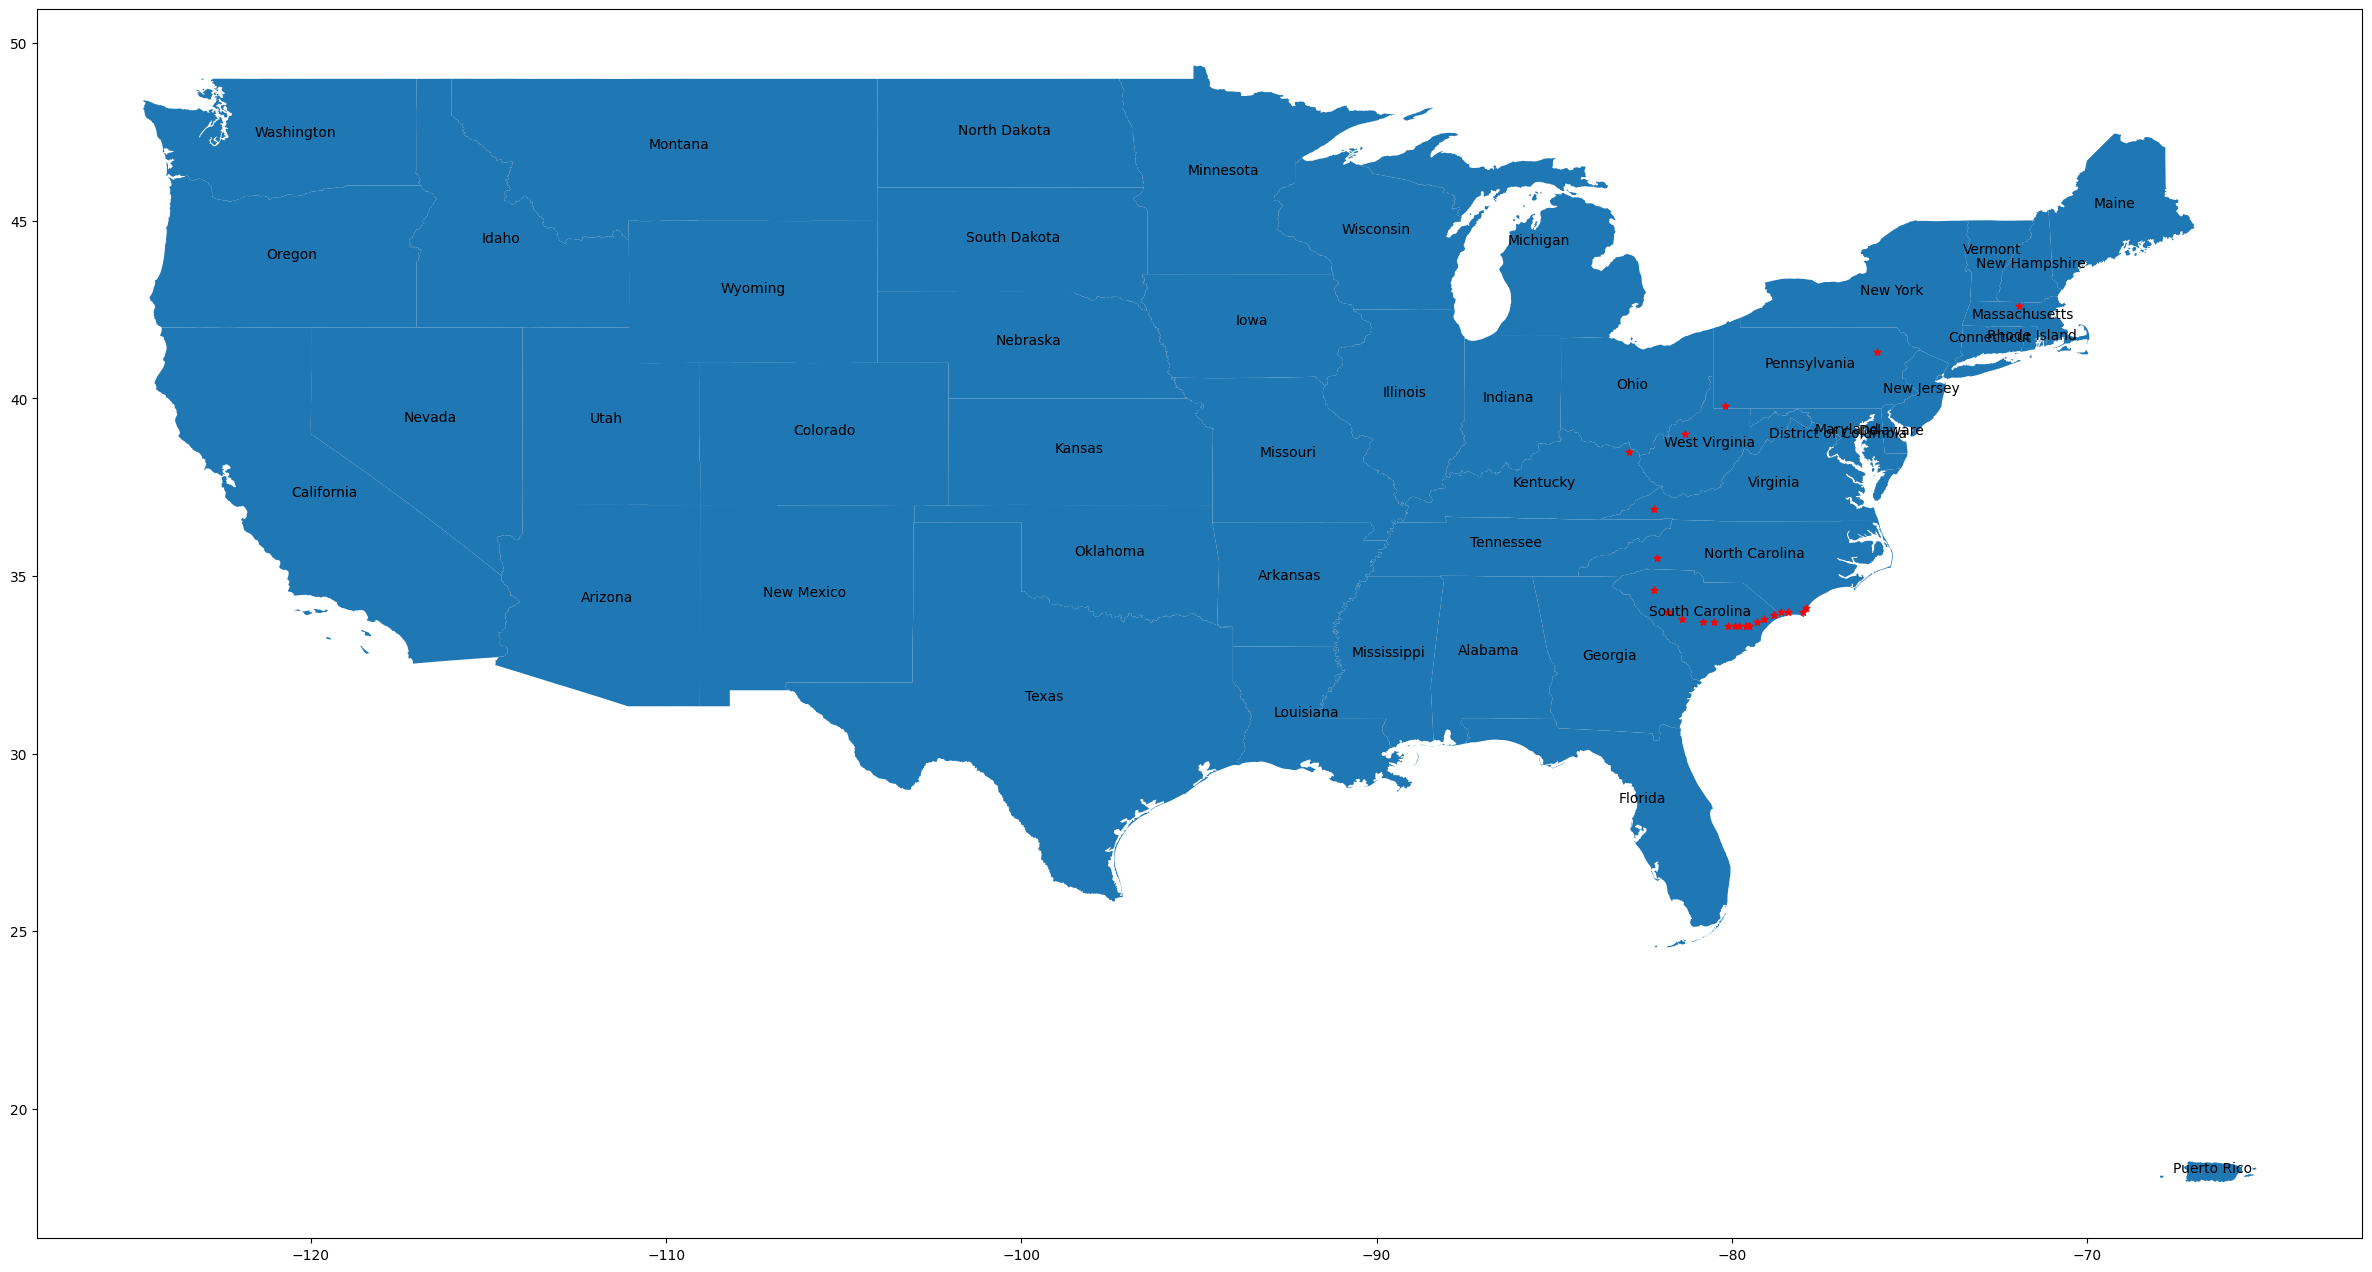

In [132]:
#@markdown Fill in the blank code. Double-click here to reveal
# Plot the US states without Alaska and Hawaii
df = country[country['NAME'].isin(['Alaska','Hawaii']) == False]
ax = df.plot(figsize=(30,20))

#  Annotate the US states with their names
annotate= df.apply(lambda x: ax.annotate(text=x['NAME'], xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
# Select the hurricane trajectory points inside the US boundary with the overlay operation
res_intersection = gdf_hurricane_florence.overlay(country, how='intersection')
# Plot the hurricane trajectory inside US boundary
res_intersection.plot(ax=ax, color='red', marker="*", markersize=25)

#donc là JE VOIS QUE L'HURRICANE EST PASSE PAR
#PENNSYLVANIA, KENTUCKY,WEST VIRGINIA, VIRGINIA, SOUTH CAROLINA